In [1]:
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
%matplotlib inline
df = pd.read_csv("bowlers.csv")
df

,Player Name,Span,Mat,Inns,Overs,Mdns,Runs,Wkts,BBI,Ave,Econ,SR,4WH,5WH,Team name,Nation
0,Wahab Riaz,2016-2021,67,66,249.5,2,1844,94,17-Apr,19.61,7.38,15.9,1,0,(Peshawar Zalmi),Pakistan
1,Hasan Ali,2016-2021,55,54,205.0,1,1504,72,15-Apr,20.88,7.33,17.0,3,0,(Peshawar Zalmi),Pakistan
2,Faheem Ashraf,2018-2021,39,39,132.5,1,1042,55,19-Jun,18.94,7.84,14.4,1,1,(Islamabad United),Pakistan
3,Mohammad Nawaz,2016-2021,61,61,201.4,1,1447,55,13-Apr,26.30,7.17,22.0,1,0,(Quetta Gladiators),Pakistan
4,Mohammad Amir,2016-2021,59,58,216.2,6,1598,54,25-Apr,29.59,7.38,24.0,2,0,(Karachi Kings),Pakistan
5,Sohail Tanvir,2016-2021,54,52,188.5,2,1447,53,13-Apr,27.30,7.66,21.3,2,0,(Quetta Gladiators),Pakistan
6,Shaheen Shah Afridi,2018-2021,37,37,138.3,3,1060,50,5-Apr,21.20,7.65,16.6,1,1,(Lahore Qalandars),Pakistan
7,Shadab Khan,2017-2021,52,52,184.4,0,1368,46,13-Mar,29.73,7.40,24.0,0,0,(Islamabad United),Pakistan
8,Shahid Afridi,2016-2021,50,48,161.4,5,1127,44,5-Jul,25.61,6.97,22.0,0,1,(Peshawar Zalmi),Pakistan
9,Mohammad Irfan,2016-2021,51,49,185.0,3,1285,43,22-Mar,29.88,6.94,25.8,0,0,(Peshawar Zalmi),Pakistan


In [6]:
dfAve = df['Ave']
dfEcon = df['Econ']
dfSr = df['SR']

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Player Name  50 non-null     object 
 1   Span         50 non-null     object 
 2   Mat          50 non-null     int64  
 3   Inns         50 non-null     int64  
 4   Overs        50 non-null     float64
 5   Mdns         50 non-null     int64  
 6   Runs         50 non-null     int64  
 7   Wkts         50 non-null     int64  
 8   BBI          50 non-null     object 
 9   Ave          50 non-null     float64
 10  Econ         50 non-null     float64
 11  SR           50 non-null     float64
 12  4WH          50 non-null     int64  
 13  5WH          50 non-null     int64  
 14  Team name    50 non-null     object 
 15  Nation       50 non-null     object 
dtypes: float64(4), int64(7), object(5)
memory usage: 6.4+ KB


In [4]:
#Elbow plot technique:
k_rng = range(1,10)
sse = []
for k in k_rng:
    nkm = KMeans(n_clusters=k)
    nkm.fit(df[['Ave','Econ','SR']])
    sse.append(nkm.inertia_)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


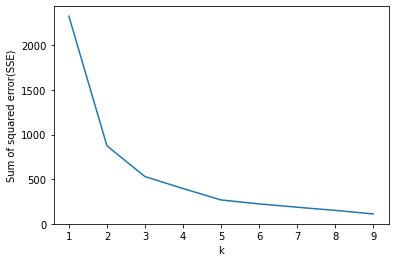

In [5]:
plt.xlabel("k")
plt.ylabel("Sum of squared error(SSE)")
plt.plot(k_rng,sse)

In [7]:
totalPlayers = df.index
print("Total number players in dataset are: ",len(totalPlayers))

Total number players in dataset are:  50


In [8]:
km = KMeans(n_clusters=3, random_state = 50)

In [13]:
y_pred = km.fit_predict(df[['Ave','Econ','SR']])
y_pred

array([0, 0, 0, 2, 1, 2, 0, 1, 2, 1, 0, 2, 1, 0, 0, 1, 1, 2, 2, 2, 2, 0,
       2, 1, 0, 2, 2, 1, 2, 0, 2, 2, 1, 0, 0, 0, 2, 1, 0, 1, 2, 1, 1, 1,
       0, 0, 0, 2, 1, 0])

In [14]:
df['status'] = y_pred
df

,Player Name,Span,Mat,Inns,Overs,Mdns,Runs,Wkts,BBI,Ave,Econ,SR,4WH,5WH,Team name,Nation,status
0,Wahab Riaz,2016-2021,67,66,249.5,2,1844,94,17-Apr,19.61,7.38,15.9,1,0,(Peshawar Zalmi),Pakistan,0
1,Hasan Ali,2016-2021,55,54,205.0,1,1504,72,15-Apr,20.88,7.33,17.0,3,0,(Peshawar Zalmi),Pakistan,0
2,Faheem Ashraf,2018-2021,39,39,132.5,1,1042,55,19-Jun,18.94,7.84,14.4,1,1,(Islamabad United),Pakistan,0
3,Mohammad Nawaz,2016-2021,61,61,201.4,1,1447,55,13-Apr,26.30,7.17,22.0,1,0,(Quetta Gladiators),Pakistan,2
4,Mohammad Amir,2016-2021,59,58,216.2,6,1598,54,25-Apr,29.59,7.38,24.0,2,0,(Karachi Kings),Pakistan,1
5,Sohail Tanvir,2016-2021,54,52,188.5,2,1447,53,13-Apr,27.30,7.66,21.3,2,0,(Quetta Gladiators),Pakistan,2
6,Shaheen Shah Afridi,2018-2021,37,37,138.3,3,1060,50,5-Apr,21.20,7.65,16.6,1,1,(Lahore Qalandars),Pakistan,0
7,Shadab Khan,2017-2021,52,52,184.4,0,1368,46,13-Mar,29.73,7.40,24.0,0,0,(Islamabad United),Pakistan,1
8,Shahid Afridi,2016-2021,50,48,161.4,5,1127,44,5-Jul,25.61,6.97,22.0,0,1,(Peshawar Zalmi),Pakistan,2
9,Mohammad Irfan,2016-2021,51,49,185.0,3,1285,43,22-Mar,29.88,6.94,25.8,0,0,(Peshawar Zalmi),Pakistan,1


In [15]:
df1 = df[df.status==0]
df2 = df[df.status==1]
df3 = df[df.status==2]

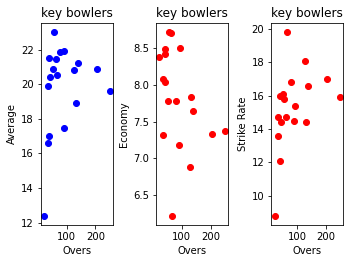

In [16]:
plt.subplot(1,3,1)
plt.scatter(df1['Overs'],df1['Ave'],color="blue")
plt.title("key bowlers")
plt.xlabel("Overs")
plt.ylabel("Average")

plt.subplot(1,3,2)
plt.scatter(df1['Overs'],df1['Econ'],color="red")
plt.title("key bowlers")
plt.xlabel("Overs")
plt.ylabel("Economy")

plt.subplot(1,3,3)
plt.scatter(df1['Overs'],df1['SR'],color="red")
plt.title("key bowlers")
plt.xlabel("Overs")
plt.ylabel("Strike Rate")

plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.8, 
                    top=0.8, 
                    wspace=0.6, 
                    hspace=0.6)

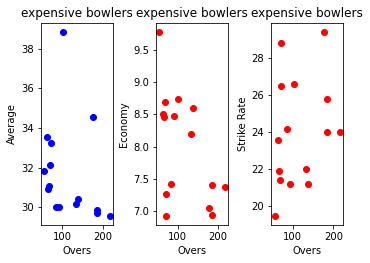

In [17]:
plt.subplot(1,3,1)
plt.scatter(df2['Overs'],df2['Ave'],color="blue")
plt.title("expensive bowlers")
plt.xlabel("Overs")
plt.ylabel("Average")

plt.subplot(1,3,2)
plt.scatter(df2['Overs'],df2['Econ'],color="red")
plt.title("expensive bowlers")
plt.xlabel("Overs")
plt.ylabel("Economy")

plt.subplot(1,3,3)
plt.scatter(df2['Overs'],df2['SR'],color="red")
plt.title("expensive bowlers")
plt.xlabel("Overs")
plt.ylabel("Strike Rate")

plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.8, 
                    top=0.8, 
                    wspace=0.6, 
                    hspace=0.6)

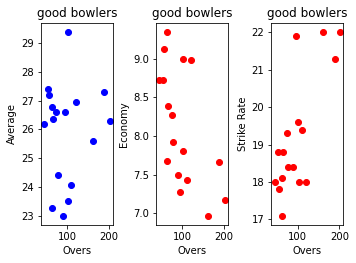

In [18]:
plt.subplot(1,3,1)
plt.scatter(df3['Overs'],df3['Ave'],color="blue")
plt.title("good bowlers")
plt.xlabel("Overs")
plt.ylabel("Average")

plt.subplot(1,3,2)
plt.scatter(df3['Overs'],df3['Econ'],color="red")
plt.title("good bowlers")
plt.xlabel("Overs")
plt.ylabel("Economy")

plt.subplot(1,3,3)
plt.scatter(df3['Overs'],df3['SR'],color="red")
plt.title("good bowlers")
plt.xlabel("Overs")
plt.ylabel("Strike Rate")

plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.8, 
                    top=0.8, 
                    wspace=0.6, 
                    hspace=0.6)

In [19]:
mydict = {0:"key_bowler",1:"expensive_bowler",2:"good_bowler"}
df = df.replace({"status":mydict})
df

,Player Name,Span,Mat,Inns,Overs,Mdns,Runs,Wkts,BBI,Ave,Econ,SR,4WH,5WH,Team name,Nation,status
0,Wahab Riaz,2016-2021,67,66,249.5,2,1844,94,17-Apr,19.61,7.38,15.9,1,0,(Peshawar Zalmi),Pakistan,key_bowler
1,Hasan Ali,2016-2021,55,54,205.0,1,1504,72,15-Apr,20.88,7.33,17.0,3,0,(Peshawar Zalmi),Pakistan,key_bowler
2,Faheem Ashraf,2018-2021,39,39,132.5,1,1042,55,19-Jun,18.94,7.84,14.4,1,1,(Islamabad United),Pakistan,key_bowler
3,Mohammad Nawaz,2016-2021,61,61,201.4,1,1447,55,13-Apr,26.30,7.17,22.0,1,0,(Quetta Gladiators),Pakistan,good_bowler
4,Mohammad Amir,2016-2021,59,58,216.2,6,1598,54,25-Apr,29.59,7.38,24.0,2,0,(Karachi Kings),Pakistan,expensive_bowler
5,Sohail Tanvir,2016-2021,54,52,188.5,2,1447,53,13-Apr,27.30,7.66,21.3,2,0,(Quetta Gladiators),Pakistan,good_bowler
6,Shaheen Shah Afridi,2018-2021,37,37,138.3,3,1060,50,5-Apr,21.20,7.65,16.6,1,1,(Lahore Qalandars),Pakistan,key_bowler
7,Shadab Khan,2017-2021,52,52,184.4,0,1368,46,13-Mar,29.73,7.40,24.0,0,0,(Islamabad United),Pakistan,expensive_bowler
8,Shahid Afridi,2016-2021,50,48,161.4,5,1127,44,5-Jul,25.61,6.97,22.0,0,1,(Peshawar Zalmi),Pakistan,good_bowler
9,Mohammad Irfan,2016-2021,51,49,185.0,3,1285,43,22-Mar,29.88,6.94,25.8,0,0,(Peshawar Zalmi),Pakistan,expensive_bowler


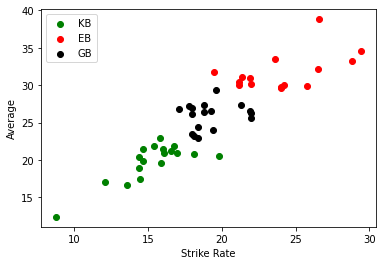

In [20]:
plt.scatter(df1['SR'],df1['Ave'],color='green',label='KB')
plt.scatter(df2['SR'],df2['Ave'],color='red',label='EB')
plt.scatter(df3['SR'],df3['Ave'],color='black',label='GB')
plt.xlabel('Strike Rate')
plt.ylabel('Average')
plt.legend()

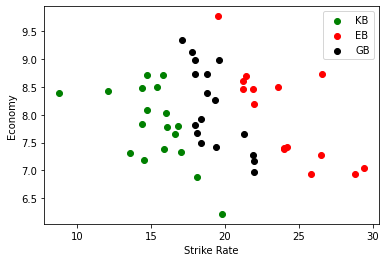

In [21]:
plt.scatter(df1['SR'],df1['Econ'],color='green',label='KB')
plt.scatter(df2['SR'],df2['Econ'],color='red',label='EB')
plt.scatter(df3['SR'],df3['Econ'],color='black',label='GB')
plt.xlabel('Strike Rate')
plt.ylabel('Economy')
plt.legend()

In [22]:
scaler = MinMaxScaler()
df['Ave'] = scaler.fit_transform(df[['Ave']])
df['Econ'] = scaler.fit_transform(df[['Econ']])
df['SR'] = scaler.fit_transform(df[['SR']])
df.head()

,Player Name,Span,Mat,Inns,Overs,Mdns,Runs,Wkts,BBI,Ave,Econ,SR,4WH,5WH,Team name,Nation,status
0,Wahab Riaz,2016-2021,67,66,249.5,2,1844,94,17-Apr,0.272899,0.326761,0.344660,1,0,(Peshawar Zalmi),Pakistan,key_bowler
1,Hasan Ali,2016-2021,55,54,205.0,1,1504,72,15-Apr,0.320969,0.312676,0.398058,3,0,(Peshawar Zalmi),Pakistan,key_bowler
2,Faheem Ashraf,2018-2021,39,39,132.5,1,1042,55,19-Jun,0.247540,0.456338,0.271845,1,1,(Islamabad United),Pakistan,key_bowler
3,Mohammad Nawaz,2016-2021,61,61,201.4,1,1447,55,13-Apr,0.526117,0.267606,0.640777,1,0,(Quetta Gladiators),Pakistan,good_bowler
4,Mohammad Amir,2016-2021,59,58,216.2,6,1598,54,25-Apr,0.650643,0.326761,0.737864,2,0,(Karachi Kings),Pakistan,expensive_bowler


In [27]:
# so we will perform clustering again to train our model
km = KMeans(n_clusters=3, random_state = 50)
y_pred = km.fit_predict(df[['Ave','Econ','SR']])
y_pred

array([1, 1, 1, 2, 2, 2, 1, 2, 2, 2, 1, 0, 0, 1, 1, 0, 2, 1, 1, 0, 1, 1,
       2, 0, 1, 1, 0, 0, 0, 1, 1, 0, 2, 1, 2, 1, 0, 0, 1, 0, 0, 0, 2, 0,
       1, 1, 1, 0, 2, 1])

In [28]:
df['status'] = y_pred
df

,Player Name,Span,Mat,Inns,Overs,Mdns,Runs,Wkts,BBI,Ave,Econ,SR,4WH,5WH,Team name,Nation,status
0,Wahab Riaz,2016-2021,67,66,249.5,2,1844,94,17-Apr,0.272899,0.326761,0.344660,1,0,(Peshawar Zalmi),Pakistan,1
1,Hasan Ali,2016-2021,55,54,205.0,1,1504,72,15-Apr,0.320969,0.312676,0.398058,3,0,(Peshawar Zalmi),Pakistan,1
2,Faheem Ashraf,2018-2021,39,39,132.5,1,1042,55,19-Jun,0.247540,0.456338,0.271845,1,1,(Islamabad United),Pakistan,1
3,Mohammad Nawaz,2016-2021,61,61,201.4,1,1447,55,13-Apr,0.526117,0.267606,0.640777,1,0,(Quetta Gladiators),Pakistan,2
4,Mohammad Amir,2016-2021,59,58,216.2,6,1598,54,25-Apr,0.650643,0.326761,0.737864,2,0,(Karachi Kings),Pakistan,2
5,Sohail Tanvir,2016-2021,54,52,188.5,2,1447,53,13-Apr,0.563967,0.405634,0.606796,2,0,(Quetta Gladiators),Pakistan,2
6,Shaheen Shah Afridi,2018-2021,37,37,138.3,3,1060,50,5-Apr,0.333081,0.402817,0.378641,1,1,(Lahore Qalandars),Pakistan,1
7,Shadab Khan,2017-2021,52,52,184.4,0,1368,46,13-Mar,0.655942,0.332394,0.737864,0,0,(Islamabad United),Pakistan,2
8,Shahid Afridi,2016-2021,50,48,161.4,5,1127,44,5-Jul,0.500000,0.211268,0.640777,0,1,(Peshawar Zalmi),Pakistan,2
9,Mohammad Irfan,2016-2021,51,49,185.0,3,1285,43,22-Mar,0.661620,0.202817,0.825243,0,0,(Peshawar Zalmi),Pakistan,2


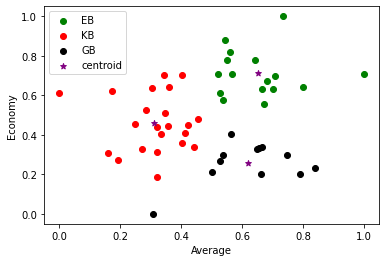

In [29]:
df1 = df[df.status==0]
df2 = df[df.status==1]
df3 = df[df.status==2]

plt.scatter(df1['Ave'],df1['Econ'],color='green',label="EB")
plt.scatter(df2['Ave'],df2['Econ'],color='red',label="KB")
plt.scatter(df3['Ave'],df3['Econ'],color='black',label="GB")
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color="purple",marker="*",label="centroid")
plt.xlabel('Average')
plt.ylabel('Economy')
plt.legend()

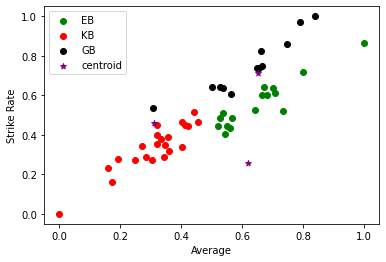

In [30]:

plt.scatter(df1['Ave'],df1['SR'],color='green',label="EB")
plt.scatter(df2['Ave'],df2['SR'],color='red',label="KB")
plt.scatter(df3['Ave'],df3['SR'],color='black',label="GB")
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color="purple",marker="*",label="centroid")
plt.xlabel('Average')
plt.ylabel('Strike Rate')
plt.legend()

In [31]:
myLabel = {0:"expensive_bowler",1:"key_bowler",2:"good_bowler"}
df = df.replace({"status":myLabel})
df

,Player Name,Span,Mat,Inns,Overs,Mdns,Runs,Wkts,BBI,Ave,Econ,SR,4WH,5WH,Team name,Nation,status
0,Wahab Riaz,2016-2021,67,66,249.5,2,1844,94,17-Apr,0.272899,0.326761,0.344660,1,0,(Peshawar Zalmi),Pakistan,key_bowler
1,Hasan Ali,2016-2021,55,54,205.0,1,1504,72,15-Apr,0.320969,0.312676,0.398058,3,0,(Peshawar Zalmi),Pakistan,key_bowler
2,Faheem Ashraf,2018-2021,39,39,132.5,1,1042,55,19-Jun,0.247540,0.456338,0.271845,1,1,(Islamabad United),Pakistan,key_bowler
3,Mohammad Nawaz,2016-2021,61,61,201.4,1,1447,55,13-Apr,0.526117,0.267606,0.640777,1,0,(Quetta Gladiators),Pakistan,good_bowler
4,Mohammad Amir,2016-2021,59,58,216.2,6,1598,54,25-Apr,0.650643,0.326761,0.737864,2,0,(Karachi Kings),Pakistan,good_bowler
5,Sohail Tanvir,2016-2021,54,52,188.5,2,1447,53,13-Apr,0.563967,0.405634,0.606796,2,0,(Quetta Gladiators),Pakistan,good_bowler
6,Shaheen Shah Afridi,2018-2021,37,37,138.3,3,1060,50,5-Apr,0.333081,0.402817,0.378641,1,1,(Lahore Qalandars),Pakistan,key_bowler
7,Shadab Khan,2017-2021,52,52,184.4,0,1368,46,13-Mar,0.655942,0.332394,0.737864,0,0,(Islamabad United),Pakistan,good_bowler
8,Shahid Afridi,2016-2021,50,48,161.4,5,1127,44,5-Jul,0.500000,0.211268,0.640777,0,1,(Peshawar Zalmi),Pakistan,good_bowler
9,Mohammad Irfan,2016-2021,51,49,185.0,3,1285,43,22-Mar,0.661620,0.202817,0.825243,0,0,(Peshawar Zalmi),Pakistan,good_bowler


In [32]:
df['Ave'] = dfAve
df['Econ'] = dfEcon
df['SR'] = dfSr
df

,Player Name,Span,Mat,Inns,Overs,Mdns,Runs,Wkts,BBI,Ave,Econ,SR,4WH,5WH,Team name,Nation,status
0,Wahab Riaz,2016-2021,67,66,249.5,2,1844,94,17-Apr,19.61,7.38,15.9,1,0,(Peshawar Zalmi),Pakistan,key_bowler
1,Hasan Ali,2016-2021,55,54,205.0,1,1504,72,15-Apr,20.88,7.33,17.0,3,0,(Peshawar Zalmi),Pakistan,key_bowler
2,Faheem Ashraf,2018-2021,39,39,132.5,1,1042,55,19-Jun,18.94,7.84,14.4,1,1,(Islamabad United),Pakistan,key_bowler
3,Mohammad Nawaz,2016-2021,61,61,201.4,1,1447,55,13-Apr,26.30,7.17,22.0,1,0,(Quetta Gladiators),Pakistan,good_bowler
4,Mohammad Amir,2016-2021,59,58,216.2,6,1598,54,25-Apr,29.59,7.38,24.0,2,0,(Karachi Kings),Pakistan,good_bowler
5,Sohail Tanvir,2016-2021,54,52,188.5,2,1447,53,13-Apr,27.30,7.66,21.3,2,0,(Quetta Gladiators),Pakistan,good_bowler
6,Shaheen Shah Afridi,2018-2021,37,37,138.3,3,1060,50,5-Apr,21.20,7.65,16.6,1,1,(Lahore Qalandars),Pakistan,key_bowler
7,Shadab Khan,2017-2021,52,52,184.4,0,1368,46,13-Mar,29.73,7.40,24.0,0,0,(Islamabad United),Pakistan,good_bowler
8,Shahid Afridi,2016-2021,50,48,161.4,5,1127,44,5-Jul,25.61,6.97,22.0,0,1,(Peshawar Zalmi),Pakistan,good_bowler
9,Mohammad Irfan,2016-2021,51,49,185.0,3,1285,43,22-Mar,29.88,6.94,25.8,0,0,(Peshawar Zalmi),Pakistan,good_bowler


In [33]:
df.to_csv("bowlersLabel.csv",index=False)